# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Steps to run the files

- Run 'MNIST_dataset_downloader.py'
    - It will download MNIST data and convert into mat files for easy use'
    

- Run 'MNIST_sequence_generator.py'
    - 'It will make artificial data that can be used to train our neural network'
    
    
- Run 'SVHN_Data_Processing.py'
    - 'It will download and prepare SVHN Data for using in next files'

----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and 

#### use five classifiers on top of your deep network. 

You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0))

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

** Code Can be foung in 'CNN_on_Multi.ipynb' **

** Here I have pasted Code templates from that file **

### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:** 
My Model is based on Convolutional Neural Network

**What is a Convolutional Network Networks (CNN)**

A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization.

**Why did I choose CNN**

CNN give much better results then a network in whivh all layers are fully connected. I read many papers and thus decided to choose CNN because of it's peak performance

In [ ]:
'''
HEIGHT = 28
No_Images = 5
WIDTH = HEIGHT * No_Images
    
graph = tf.Graph()

with graph.as_default():
    HEIGHT = 28
    No_Images = 5
    WIDTH = HEIGHT * No_Images
#     HEIGHT = tf.placeholder(tf.float32)
#     WIDTH = tf.placeholder(tf.float32)
    
    X = tf.placeholder(tf.float32, [None, HEIGHT, WIDTH, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 5 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 6     # First Conv Layer with depth 6
    L = 12     # Second Conv Layer with depth 12
    M = 24    # Third Conv layer with depth 24
    N = 200   # Fourth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    
    W5_1 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_2 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_3 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_4 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_5 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    # Model
    stride = 1  # output is 28x140
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 14x70
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 7x35
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    YY4 = tf.nn.dropout(Y4, pkeep)
    
    Ylogits_1 = tf.matmul(YY4, W5_1) + B5_1
    Ylogits_2 = tf.matmul(YY4, W5_2) + B5_2
    Ylogits_3 = tf.matmul(YY4, W5_3) + B5_3
    Ylogits_4 = tf.matmul(YY4, W5_4) + B5_4
    Ylogits_5 = tf.matmul(YY4, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
  
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

#     cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

# Having two different functions is a convenience, as they produce the same result.
# The difference is simple:
# For sparse_softmax_cross_entropy_with_logits, labels must have the shape [batch_size] and the dtype int32 or int64. Each label is an int in range [0, num_classes).
# For softmax_cross_entropy_with_logits, labels must have the shape [batch_size, num_classes] and dtype float32 or float64.
# Labels used in softmax_cross_entropy_with_logits are the one hot version of labels used in sparse_softmax_cross_entropy_with_logits.
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    model_saver = tf.train.Saver()
    
'''

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:**
Final Model Contains 5 layers.

- 3 Convolutional Layer
    - First Convolutional layer with depth 6
        - ReLU
        - Stride of  1 x 1
        - input 32 x 32 x 1
        - output 32 x 32 x 6
    
    - Second Convolutional layer with depth 12
        - ReLU
        - Stride of  2 x 2
        - input 32 x 32 x 6
        - output 16 x 16 x 12
    
    - Third Convolutional layer with deth 24
        - ReLU
        - Stride of  2 x 2
        - input 16 x 16 x 12
        - output 8 x 8 x 24


- One Fully Connected Layer
    - Reshape
        - Reshaped to 1 dimension with 8 * 8 * 24 features
        - 200 Neurons
        
    - Dropout
        - ReLU
        - Dropout with keeping probablity -> pkeep
    

- Output Layer
    - Will contain 5 different classifiers on top
    - Each classifier
        - Different Weight and Biases
        - Ylogit = tf.matmul(Dropout, W) + B
        - Output = softmax(Ylogit)

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:**
I created Synthetic data from MNIST dataset

Steps for creating data are as follows
- Insert white spaces into MNIST Training and Testing data(i.e. numpy.zeros(m x n))
- Shuffle it so as to create random distribution
- Take any 5 image at random and combine them to create one image
- Keep repeting the process as many times as images needed

**Python file - 'MNIST_sequence_generator.py'**

20,000 steps in batches of 100

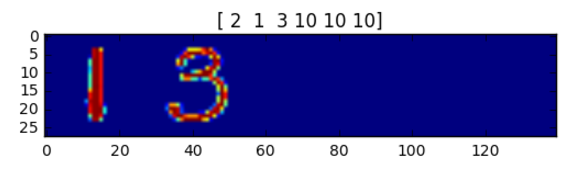

In [4]:
from PIL import Image
Image.open('Mnist_multi_1.png')

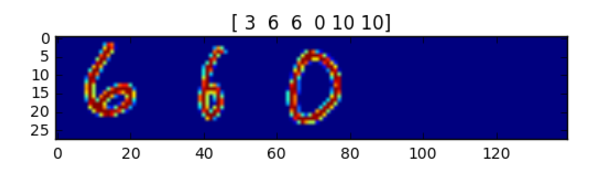

In [5]:
Image.open('Mnist_multi_2.png')

    Loss at step 0: 765.042358
    Minibatch accuracy: 9.6%
    ('Learning rate : ', 0.003)

    Loss at step 1000: 1.754192
    Minibatch accuracy: 89.0%
    ('Learning rate : ', 0.0018589389131666372)
    
    Loss at step 5000: 0.651769
    Minibatch accuracy: 95.8%
    ('Learning rate : ', 0.00033804649600930654)

    Loss at step 10000: 0.450649
    Minibatch accuracy: 98.0%
    ('Learning rate : ', 0.00011954004629734786)

    Loss at step 12000: 0.241098
    Minibatch accuracy: 98.2%
    ('Learning rate : ', 0.00010718838131233245)

    Loss at step 15000: 0.248242
    Minibatch accuracy: 98.0%
    ('Learning rate : ', 0.00010160394467342873)

    Loss at step 18000: 0.298687
    Minibatch accuracy: 97.6%
    ('Learning rate : ', 0.00010035788843185138)

    Loss at step 20000: 0.238431
    Minibatch accuracy: 98.4%

**('Test accuracy: ', 97.966)**

- max_learning_rate = 0.003
- min_learning_rate = 0.0001
- decay_speed = 2000.0
- learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-step/decay_speed)

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
'''
graphaa = tf.Graph()

with graphaa.as_default():
    HEIGHT_1 = 32
    WIDTH_1 = 32
    
    X = tf.placeholder(tf.float32, [None, HEIGHT_1, WIDTH_1, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 5 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 6     # First Conv Layer with depth 6
    L = 12     # Second Conv Layer with depth 12
    M = 24    # Third Conv layer with depth 24
    N = 200   # Fourth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    
    W5_1 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_2 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_3 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_4 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_5 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    # Model
    stride = 1  # output is 28x140
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 14x70
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 7x35
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    YY4 = tf.nn.dropout(Y4, pkeep)
    
    Ylogits_1 = tf.matmul(YY4, W5_1) + B5_1
    Ylogits_2 = tf.matmul(YY4, W5_2) + B5_2
    Ylogits_3 = tf.matmul(YY4, W5_3) + B5_3
    Ylogits_4 = tf.matmul(YY4, W5_4) + B5_4
    Ylogits_5 = tf.matmul(YY4, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
  
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    model_saver = tf.train.Saver()
    
'''

### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

** Testing and training datasets are made using the code in file - 'SVHN_Data_Processing.py'**

**Answer:**
50,000 steps in batches of 100

Trainig and testing data were converted into 32 x 32 sizes from randomly given sizes.
Model was trained and tested on this dataset using the architecture described above

    Loss at step 0: 14.134789
    Minibatch accuracy: 8.8%
    ('Learning rate : ', 0.003)

    Loss at step 500: 2.784440
    Minibatch accuracy: 81.6%
    ('Learning rate : ', 0.002358522270907074)

    Loss at step 1000: 1.706626
    Minibatch accuracy: 87.6%
    ('Learning rate : ', 0.0018589389131666372)

    Loss at step 5000: 0.925228
    Minibatch accuracy: 94.8%
    ('Learning rate : ', 0.00033804649600930654)

    Loss at step 15000: 0.395974
    Minibatch accuracy: 97.4%
    ('Learning rate : ', 0.00010160394467342873)

    Loss at step 30000: 0.530432
    Minibatch accuracy: 96.6%
    ('Learning rate : ', 0.00010000088711672946)

    Loss at step 50000: 0.334646
    Minibatch accuracy: 98.2%
    ('Learning rate : ', 0.00010000000004027504)

**('Test accuracy: ', 92.88950107131924)**

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:**
I did not make any significant changes as my machine was very slow and running this iteration took several hours.
I believe that the performance could be improved by tweking some things, but i need a faster machine with GPU to validate that

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:**
Final test accuracy came to be ** 92.889 %**.

Which can be considered preety descent. It is still not good enough to be applied on a realistic dataset, but after certain improvements, i believe it can be applied on a realistic technology

Banchmark is at  ** 96.03% **, which is nearly 3% more then what i have been able to achieve.


I believe that the following architecture will result in significant improvement


- 3 Convolutional Layer with Batch Norm
    - First Convolutional layer with depth 12
        - Batch Normalization  
    - Sub Sampling Layer  
    - Second Convolutional layer with depth 24
        - Batch Normalization     
    - Sub Sampling
    - Third Convolutional layer with deth 36
        - Batch Normalization      
    - Sub Sampling
- One Fully Connected Layer - 300 neurons
    - Reshape
    - Dropout
- Output Layer
    - Will contain 5 different classifiers on top

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

**Answer:**
I captured images from my cell phone and resized them to 32 x 32

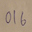

In [8]:
Image.open('016_.jpg')

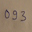

In [9]:
Image.open('093_.jpg')

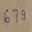

In [10]:
Image.open('679_.jpg')

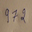

In [11]:
Image.open('972_.jpg')

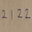

In [12]:
Image.open('2122_.jpg')

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

**Answer:**

**NO**

My Model did very poor on the given images, even though these images are quite similar to SVHN Dataset images. I can not understand the reason for this poor performance

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
### Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**
I have already used bounding boxes while processing the SVHN Data, so my resluts are effectivlely after localization

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

**Answer:**
Yes, the accuracy was 92.889%

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.